In [6]:
# required libraries
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt     # creating plots
import pandas as pd                 # loading data
from mpl_toolkits import mplot3d
import seaborn as sbn  

# Read the data - note that this is a csv file.
overhead_df = pd.read_csv('MLR_Q09_FactoryOverhead.csv')
overhead_df.head(10)

,Month,Machine Hours,Production Runs,Overhead Cost
0,1,1539,31,99798
1,2,1284,29,87804
2,3,1490,27,93681
3,4,1355,22,82262
4,5,1500,35,106968
5,6,1777,30,107925
6,7,1716,41,117287
7,8,1045,29,76868
8,9,1364,47,106001
9,10,1516,21,88738


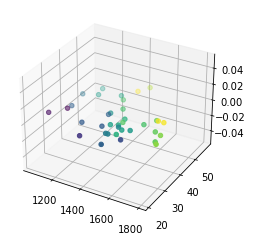

In [9]:
# Visualize the data in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

x1 = overhead_df["Machine Hours"]
x2 = overhead_df["Production Runs"]
y = overhead_df["Overhead Cost"]

ax.scatter3D(x1,x2, c=y);

In [13]:
# Train the linear regression model: Overhead = F (machine hours)

Y = overhead_df["Overhead Cost"]

X = overhead_df[['Machine Hours']]
X = sm.add_constant(X) # adding a constant

reg_model = sm.OLS(Y,X).fit()

# View the model parameters
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     22.60
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           3.57e-05
Time:                        07:57:03   Log-Likelihood:                -376.13
No. Observations:                  36   AIC:                             756.3
Df Residuals:                      34   BIC:                             759.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.862e+04   1.07e+04      4.533

# Observation:

F-test: P(F-statistic) = 3.57e-05 => model is significant overall  

Coefficient: 
Machine Hours: Probability of t-statistic, P(t) = 0.000 <0.05 *=> Machine hours is a significant parameter at 95% CI*

R-Squared: 
The R-Squared value in 0.399. This implies than only 39.9% variation in the Overhead Cost is explained by variation in the  Machine Hours alone. 

Regression Equation:
Overhead Cost = 4.862e+04 + 34.7022* Machine Hours

In [12]:
# Train the linear regression model: Overhead = F (production runs)

Y = overhead_df["Overhead Cost"]

X = overhead_df[['Production Runs']]
X = sm.add_constant(X) # adding a constant

reg_model = sm.OLS(Y,X).fit()

# View the model parameters
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     12.64
Date:                Sun, 05 Jun 2022   Prob (F-statistic):            0.00114
Time:                        07:56:51   Log-Likelihood:                -379.62
No. Observations:                  36   AIC:                             763.2
Df Residuals:                      34   BIC:                             766.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.561e+04   6808.611     

# Observation:
F-test: P(F-statistic) = 0.00114 <0.05 => model is significant overall

Coefficient: 
Production Runs: Probability of t-statistic, P(t) = 0.001 <0.05 => Production Runs is a significant parameter at 95% CI

R-Squared: 
The R-Squared value in 0.271. This implies than only 27.1% variation in the Overhead Cost is explained by variation in the  Production Runs alone. 

Regression Equation: 
Overhead Cost = 7.561e+04 + 655.0707* Production Runs

In [14]:
# Train the linear regression model: Overhead = F (machine hours, production runs) 

Y = overhead_df["Overhead Cost"]

X = overhead_df[['Machine Hours','Production Runs']]
X = sm.add_constant(X) # adding a constant

reg_model = sm.OLS(Y,X).fit()

# View the model parameters
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Overhead Cost   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           3.75e-15
Time:                        07:59:52   Log-Likelihood:                -349.07
No. Observations:                  36   AIC:                             704.1
Df Residuals:                      33   BIC:                             708.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3996.6782   6603.651     

Observation:
F-test: P(F-statistic) = 3.75e-15 <0.05 => model is significant overall

Coefficient: 
Machine Hours: Probability of t-statistic, P(t) = 0.000 <0.05 => Production Runs is a significant parameter at 95% CI
Production Runs: Probability of t-statistic, P(t) = 0.000 <0.05 => Production Runs is a significant parameter at 95% CI

R-Squared: 
The R-Squared value in 0.866. This implies than 86.6% variation in the Overhead Cost is explained by variation in the Machine Hours and Production Runs.

Regression Equation: 
Overhead Cost = 7.561e+04 + 43.5364* Machine Hours + 655.0707* Production Runs
